<a href="https://colab.research.google.com/github/lgaetano/Where-is-Waldo/blob/master/Copy_of_WheresWaldo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os

from tensorflow.keras import layers
from tensorflow.keras import Model
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
  
from tensorflow.keras.applications.inception_v3 import InceptionV3

local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model = InceptionV3(input_shape = (150, 150, 3), 
                                include_top = False, 
                                weights = None)

pre_trained_model.load_weights(local_weights_file)

for layer in pre_trained_model.layers:
  layer.trainable = False
  
# pre_trained_model.summary()

last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

--2019-11-26 03:00:43--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.76.128, 2a00:1450:400c:c02::80
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.76.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M  73.6MB/s    in 1.1s    

2019-11-26 03:00:45 (73.6 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
last layer output shape:  (None, 7, 7, 768)


In [0]:
from tensorflow.keras.optimizers import RMSprop

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense  (1, activation='sigmoid')(x)           

model = Model( pre_trained_model.input, x) 

model.compile(optimizer = RMSprop(lr=0.0001), 
              loss = 'binary_crossentropy', 
              metrics = ['acc'])


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
!git clone https://github.com/lgaetano/Where-s-Waldo.git

Cloning into 'Where-s-Waldo'...
remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 25 (delta 6), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (25/25), done.


In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import zipfile

local_zip = '/content/Where-s-Waldo/64.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

# Define our example directories and files
base_dir = '/tmp/64'

train_dir = os.path.join( base_dir, 'training')
validation_dir = os.path.join( base_dir, 'validation')

train_waldo_dir = os.path.join(train_dir, 'waldo')
train_notwaldo_dir = os.path.join(train_dir, 'notwaldo')
validation_waldo_dir = os.path.join(validation_dir, 'waldo')
validation_notwaldo_dir = os.path.join(validation_dir, 'notwaldo')

# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator( rescale = 1.0/255. )

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 20,
                                                    class_mode = 'binary', 
                                                    target_size = (150, 150))     

# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  test_datagen.flow_from_directory( validation_dir,
                                                          batch_size  = 20,
                                                          class_mode  = 'binary', 
                                                          target_size = (150, 150))

Found 4315 images belonging to 2 classes.
Found 1077 images belonging to 2 classes.


In [0]:
history = model.fit_generator(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 100,
            epochs = 20,
            validation_steps = 50,
            verbose = 2)

Epoch 1/20
Epoch 1/20
100/100 - 24s - loss: 0.0744 - acc: 0.9865 - val_loss: 0.0905 - val_acc: 0.9940
Epoch 2/20
Epoch 1/20
100/100 - 16s - loss: 0.1103 - acc: 0.9910 - val_loss: 0.0820 - val_acc: 0.9940
Epoch 3/20
Epoch 1/20
100/100 - 15s - loss: 0.0930 - acc: 0.9925 - val_loss: 0.1046 - val_acc: 0.9940
Epoch 4/20
Epoch 1/20
100/100 - 15s - loss: 0.0600 - acc: 0.9945 - val_loss: 0.1233 - val_acc: 0.9940
Epoch 5/20
Epoch 1/20
100/100 - 15s - loss: 0.0922 - acc: 0.9905 - val_loss: 0.1235 - val_acc: 0.9940
Epoch 6/20
Epoch 1/20
100/100 - 15s - loss: 0.1068 - acc: 0.9925 - val_loss: 0.1180 - val_acc: 0.9940
Epoch 7/20
Epoch 1/20
100/100 - 15s - loss: 0.1019 - acc: 0.9925 - val_loss: 0.1212 - val_acc: 0.9940
Epoch 8/20
Epoch 1/20
100/100 - 15s - loss: 0.0806 - acc: 0.9930 - val_loss: 0.1279 - val_acc: 0.9940
Epoch 9/20
Epoch 1/20
100/100 - 15s - loss: 0.0911 - acc: 0.9915 - val_loss: 0.1244 - val_acc: 0.9940
Epoch 10/20
Epoch 1/20
100/100 - 15s - loss: 0.0853 - acc: 0.9935 - val_loss: 0.14

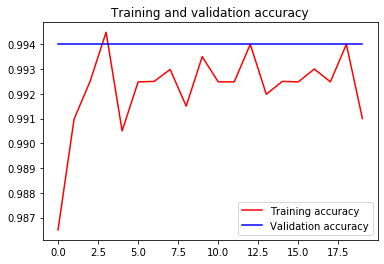

<Figure size 432x288 with 0 Axes>

In [0]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [0]:
!git init